In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('E:/project/amazon.csv')

In [3]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

# Data Cleaning and Preprocessing


In [4]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [5]:

print("Column names:", df.columns.tolist())
print("Data types:\n", df.dtypes)

Column names: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
Data types:
 product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [6]:
df.fillna(method='ffill',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11900\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [7]:
# Drop rows with NaN ratings
df.dropna(subset=['rating', 'product_id', 'user_id'], inplace=True)  # Adjust as necessary

In [ ]:
# Basic statistics of the dataset
print("Basic statistics:\n", df.describe())



In [ ]:
#Feature Engineering
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

# 3.Exploratory Data Analysis



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Top 5 popular products
top_products = df['product_id'].value_counts().head(5)
sns.barplot(x=top_products.index,y=top_products.values)
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Purchase Count')
plt.show()


In [ ]:

# Count of ratings per product
ratings_per_product = df.groupby('product_id')['rating'].count().reset_index()
ratings_per_product.columns = ['product_id', 'rating_count']

# Top 10 products by rating count
top_products = ratings_per_product.sort_values(by='rating_count', ascending=False).head(10)


In [ ]:

# Plotting the top products by rating count
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='rating_count', data=top_products)
plt.title('Top 10 Amazon Products by Rating Count')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Step 4: Visualization
import pandas as pd

# Load your DataFrame
df = pd.read_csv('amazon.csv')  # Adjust the file name accordingly

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Print columns for verification
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [10]:

# Convert relevant columns to numeric, forcing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('[$,]', '', regex=True), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('[$,]', '', regex=True), errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')


In [ ]:

# Drop rows with NaN values in the specified columns
df.dropna(subset=['rating', 'product_id', 'user_id'], inplace=True)

# Perform groupby and mean aggregation on the rating column
average_ratings = df.groupby('product_id')['rating'].mean().reset_index()

# Print the resulting DataFrame
print(average_ratings)




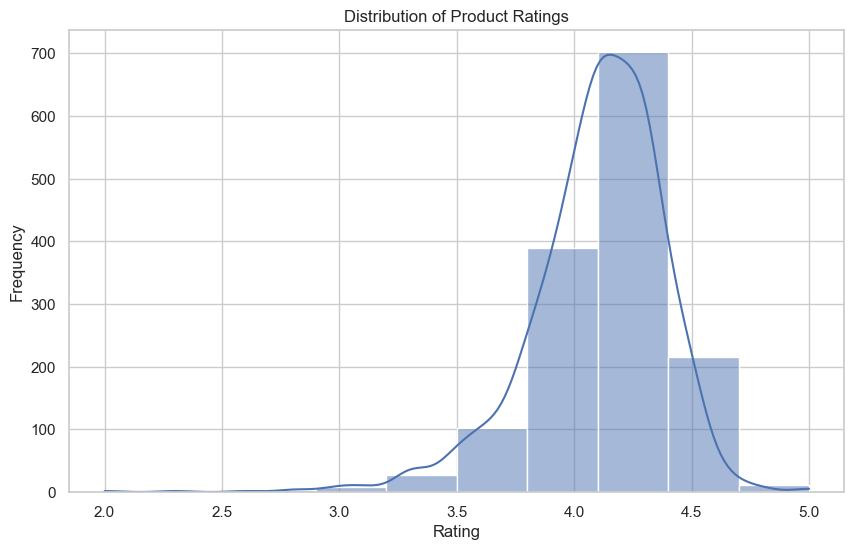

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Create a histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average Rating by Product Category


In [11]:
# Calculate average ratings by category
average_ratings_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort values by average rating
average_ratings_by_category = average_ratings_by_category.sort_values(by='rating', ascending=False)

# Create a bar plot
# Limit to top 10 categories by average rating
top_categories = average_ratings_by_category.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_11900\826121968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='rating', y='category', palette='viridis')


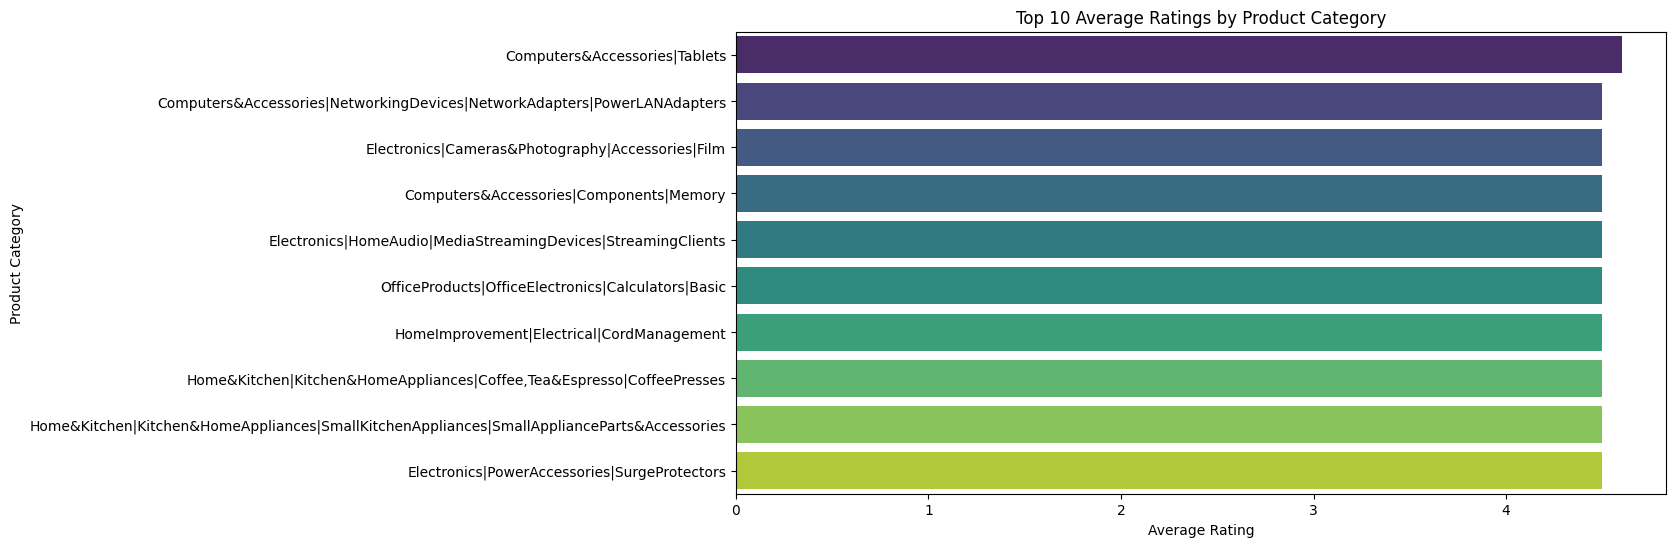

In [12]:

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='rating', y='category', palette='viridis')
plt.title('Top 10 Average Ratings by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()


# Top 10 Products by Rating


In [ ]:
# Calculate average ratings by product
top_rated_products = df.groupby('product_id')['rating'].mean().reset_index()
top_rated_products = top_rated_products.sort_values(by='rating', ascending=False).head(10)


In [ ]:

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_products, x='rating', y='product_id', palette='mako')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.show()

# Rating Count Distribution


In [ ]:
# Create a histogram of rating counts
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_count'], bins=30, kde=True)
plt.title('Distribution of Rating Counts')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Exporting cleaned data to Excel for reporting
df.to_excel('cleaned_amazon_data.xlsx', index=False)
print("Cleaned Amazon data exported to 'cleaned_amazon_data.xlsx'")


# Model Building


# Collaborative Filtering(using Surprise)

In [ ]:
pip install surprise

In [14]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load your data into a pandas DataFrame called 'amazon'
amazon = pd.read_excel('cleaned_amazon_data.xlsx')  # Use pd.read_excel for Excel files

# Replace '|' with an appropriate value (e.g., NaN or the average rating) or remove the rows containing it
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')
amazon.dropna(subset=['rating'], inplace=True)

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(amazon[['user_id', 'product_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

# Evaluate model
predictions = model.test(testset)
print("RMSE:", rmse(predictions))

ModuleNotFoundError: No module named 'surprise'

# Content-Based Filtering(using TF-IDF for product descriptions)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data into a pandas DataFrame called 'amazon_data'
amazon_data = pd.read_excel('/content/cleaned_amazon_data.xlsx')  # Replace 'your_data.csv' with your actual file path

# Compute TF-IDF matrix for product descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(amazon_data['about_product'].fillna(''))

def get_recommendations(product_name, top_n=5):
    """
    Recommends similar products based on product description similarity.
    """
    # Get the index of the product that matches the name
    product_indices = amazon_data[amazon_data['product_name'].str.contains(product_name, case=False, regex=False)].index

    # Check if any matching products were found
    if len(product_indices) == 0:
        print(f"No products found matching '{product_name}'.")
        return []  # Return an empty list if no matches

    # Get the similarity scores for the product
    similarity_scores = cosine_similarity(tfidf_matrix[product_indices[0]], tfidf_matrix)

    # Get the indices of the most similar products (excluding the product itself)
    similar_product_indices = similarity_scores.argsort()[0][::-1][1:top_n + 1]

    # Return the names of the most similar products
    return amazon_data['product_name'].iloc[similar_product_indices]

# Use a valid product name from your dataset
product_name_to_search = "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)"
recommendations = get_recommendations(product_name_to_search)

# Remove duplicates
recommendations = recommendations.drop_duplicates()

# Print the deduplicated recommendations
print(recommendations)

# Evaluation


In [ ]:
!pip install scikit-surprise

In [15]:
!pip install scikit-surprise # Installs the scikit-surprise package which contains the 'surprise' module
from surprise import accuracy # Imports the 'accuracy' module from the 'surprise' package

# Calculate RMSE and precision/recall (as needed)
rmse = accuracy.rmse(predictions) # Calculates the root mean squared error (RMSE) of the predictions

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


ModuleNotFoundError: No module named 'surprise'

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data into a pandas DataFrame called 'amazon_data'
amazon_data = pd.read_excel('/content/cleaned_amazon_data.xlsx')  # Replace 'your_data.csv' with your actual file path

# Compute TF-IDF matrix for product descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(amazon_data['about_product'].fillna(''))

def get_recommendations(product_name, top_n=5):
    """
    Recommends similar products based on product description similarity.
    """
    # Get the index of the product that matches the name
    product_indices = amazon_data[amazon_data['product_name'].str.contains(product_name, case=False, regex=False)].index

    # Check if any matching products were found
    if len(product_indices) == 0:
        print(f"No products found matching '{product_name}'.")
        return []  # Return an empty list if no matches

    # Get the similarity scores for the product
    similarity_scores = cosine_similarity(tfidf_matrix[product_indices[0]], tfidf_matrix)

    # Get the indices of the most similar products (excluding the product itself)
    similar_product_indices = similarity_scores.argsort()[0][::-1][1:top_n + 1]

    # Return the names

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_amazon_data.xlsx'

# Visualization


In [ ]:
from surprise import accuracy

# Calculate RMSE and precision/recall (as needed)
rmse = accuracy.rmse(predictions)


# Reporting


In [ ]:
# Export final report data
amazon_data.to_excel("Amazon_Project_Report.xlsx", index=False)
